In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [10]:
cfar100 = tf.keras.datasets.cifar100
(X_train, Y_train), (X_test, Y_test) = cfar100.load_data()
# normalization
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.1, random_state=24)

In [11]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(100, activation='softmax')
])

In [12]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [13]:
model_output = model.fit(X_train, Y_train, epochs=15)

model.evaluate(X_test, Y_test)

Epoch 1/15


C:\Users\nematizadeh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1407/1407 [==============================] - 31s 21ms/step - loss: 3.9256 - accuracy: 0.0974
Epoch 2/15
1407/1407 [==============================] - 28s 20ms/step - loss: 3.3090 - accuracy: 0.2000
Epoch 3/15
1407/1407 [==============================] - 32s 23ms/step - loss: 2.9993 - accuracy: 0.2577
Epoch 4/15
1407/1407 [==============================] - 26s 19ms/step - loss: 2.8045 - accuracy: 0.2962
Epoch 5/15
1407/1407 [==============================] - 27s 20ms/step - loss: 2.6612 - accuracy: 0.3244
Epoch 6/15
1407/1407 [==============================] - 34s 24ms/step - loss: 2.5468 - accuracy: 0.3495
Epoch 7/15
1407/1407 [==============================] - 31s 22ms/step - loss: 2.4545 - accuracy: 0.3678
Epoch 8/15
1407/1407 [==============================] - 36s 26ms/step - loss: 2.3725 - accuracy: 0.3872
Epoch 9/15
1407/1407 [==============================] - 38s 27ms/step - loss: 2.2961 - accuracy: 0.4012
Epoch 10/15
1407/1407 [==============================] - 30s 21ms/step - lo

[2.6704845428466797, 0.3564000129699707]

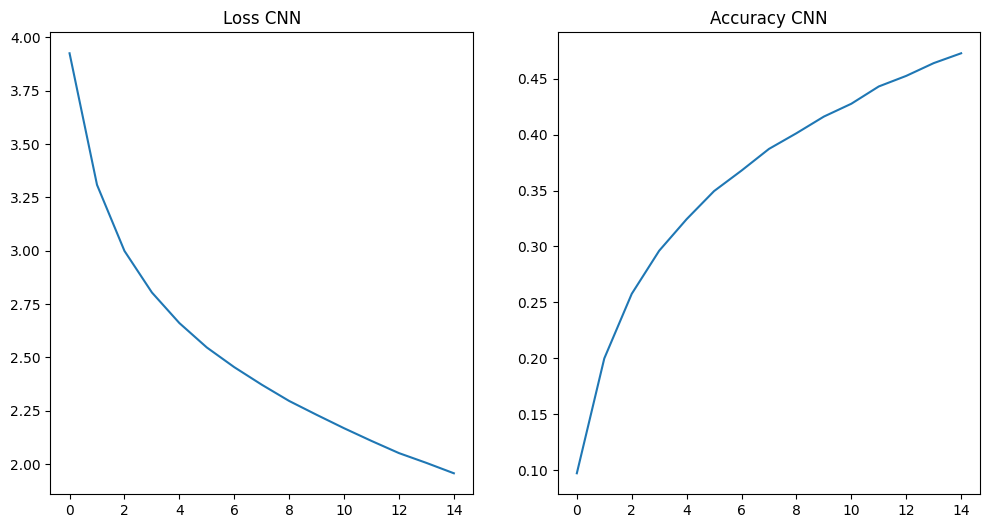

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(model_output.history['loss'])
ax1.set_title("Loss CNN")
ax2.plot(model_output.history['accuracy'])
ax2.set_title("Accuracy CNN")
plt.show()